In [1]:
import sys
#sys.path.append('../../../pdl/pdl/utils/')

import numpy as np
import matplotlib.pyplot as plt
#from logs import enable_logging, logging 
from importlib import reload
import iterativeMethods as im


In [2]:
#enable_logging(lvl=100)
A = np.array([[2, 1], [5, 7]])
f = np.array([11, 13])

u, res = im.jacobi(A, f)

For the real Jacobi method instead the spectral radius of the updating matrix is < 1.
For the real Jacobi methods it holds the fact that if the matrix is diagonally dominant then the spectral radius of the updating matrix is guaranteed to be < 1. (http://www.cs.unipr.it/~bagnara/Papers/PDF/SIREV95.pdf)
This condition does not hold for the paper Jacobi method.

In [3]:
jacobi_eig = np.linalg.eigvals(np.linalg.inv(np.diag(np.diag(A))).dot(A-np.diag(np.diag(A))))
spectral_radius = np.max(np.abs(jacobi_eig))
print(spectral_radius)

0.5976143046671969


Build the matrix A for the 2D Poisson problem

In [4]:
N = 3
A = np.eye(N**2)
# Domani length
L = 1.0
# Cell size
h = L/(N-1)

# set homegenous dirichlet BC value
b = 1.0

#Initilize forcing term
f = np.ones(N**2)*b

for i in range(N, N**2-N):
    if (i%N != 0 and i%N != N-1):
        # Left and right neigh
        A[i][i-1] = -0.25 
        A[i][i+1] = -0.25
        # Up and low neigh
        A[i][i-N] = -0.25 
        A[i][i+N] = -0.25 
        # set forcing term
        f[i] = 0


Obtain the solution with jacobi method

In [5]:
u, res = im.jacobi(A, f, max_iters=10000,tol = 1e-3)
#u = np.linalg.inv(A).dot(f)

Plot the solution
Nice reference for contour plots https://www.python-course.eu/matplotlib_contour_plot.php

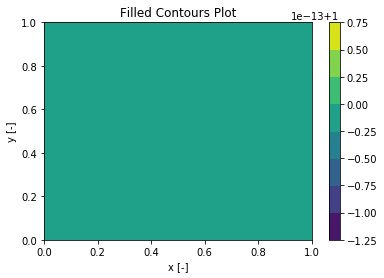

In [6]:
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

Z = np.reshape(u, [N, N])
plt.figure()
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('x [-]')
plt.ylabel('y [-]')
plt.show()

Obtain the same solution with reset operator G


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255]
[ 16  32  48  64  80  96 112 128 144 160 176 192 208 224]
[ 31  47  63  79  95 111 127 143 159 175 191 207 223 239]


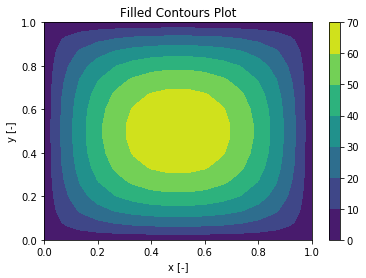

In [7]:
#### Initialize A, b
N = 16
a =  np.ones(N**2)
b = -np.ones(N**2-1)*0.25
c = -np.ones(N**2-N)*0.25

A = np.diag(a) + np.diag(b, 1) + np.diag(b, -1) + np.diag(c, N) + np.diag(c, -N)
#print(A)


b_top_idx = np.arange(N)
b_bottom_idx = np.arange(N**2-N, N**2)
b_left_idx = np.linspace(N, N**2-2*N, N-2, dtype = int)
b_right_idx = np.linspace(2*N-1, N**2-N-1, N-2, dtype = int)


print(b_top_idx)
print(b_bottom_idx)
print(b_left_idx)
print(b_right_idx)

b_idx = np.append(b_top_idx, b_bottom_idx)
b_idx = np.append(b_idx, b_left_idx)
b_idx = np.append(b_idx, b_right_idx)
#print(b_idx)
b = np.ones(np.shape(b_idx))*3.0
#print(b)
f = np.ones(N**2)

u, res = im.jacobi(A, f, b_idx = b_idx, b = b,max_iters=1000,tol = 1e-2)

x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

Z = np.reshape(u, [N, N])
plt.figure()
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('x [-]')
plt.ylabel('y [-]')
plt.show()



In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# One convolution with a 3x3 kernel
#net = nn.Conv2d(1, 1, 3, padding=1, bias=False)

# Do we want to use 3 layers?
jac = nn.Conv2d(1, 1, 3, padding=1, bias=False)

initial_weights = torch.zeros(1,1,3,3)
initial_weights[0,0,0,1] = 0.25
initial_weights[0,0,2,1] = 0.25
initial_weights[0,0,1,0] = 0.25
initial_weights[0,0,1,2] = 0.25
jac.weight = nn.Parameter(initial_weights)

for param in jac.parameters():
    param.requires_grad = False
    
for name, param in jac.named_parameters():
    print(name, param)


    
net = nn.Sequential(
    nn.Conv2d(1, 1, 3, padding=1, bias=False),
    nn.Conv2d(1, 1, 3, padding=1, bias=False),
    nn.Conv2d(1, 1, 3, padding=1, bias=False),
)


# Initialize the wights s.t. H corresponds T (see 2.3.1)
#initial_weights = torch.rand(1,1,3,3)*0.01
#initial_weights[0,0,0,1] = 0.25
#initial_weights[0,0,2,1] = 0.25
#initial_weights[0,0,1,0] = 0.25
#initial_weights[0,0,1,2] = 0.25
#initial_weights[0,0,1,1] = 1.0
#net.weight = nn.Parameter(initial_weights)

# Set the optimizer, you have to play with lr: if too big nan
optim = torch.optim.SGD(net.parameters(), lr=1e-6)
#optim = torch.optim.Adam(net.parameters(), lr=1e-6)
#optim = torch.optim.ASGD(net.parameters())
# SGD is much faster

for name, param in net.named_parameters():
    print(name, param)



weight Parameter containing:
tensor([[[[0.0000, 0.2500, 0.0000],
          [0.2500, 0.0000, 0.2500],
          [0.0000, 0.2500, 0.0000]]]])
0.weight Parameter containing:
tensor([[[[ 0.1878,  0.2623, -0.1607],
          [ 0.2837,  0.2756,  0.0679],
          [-0.1897,  0.3218,  0.0832]]]], requires_grad=True)
1.weight Parameter containing:
tensor([[[[-0.0952, -0.1935,  0.1645],
          [ 0.0357,  0.1540, -0.0453],
          [ 0.2409, -0.3309,  0.1625]]]], requires_grad=True)
2.weight Parameter containing:
tensor([[[[ 0.1240,  0.0039, -0.0776],
          [ 0.2830, -0.2546, -0.1309],
          [ 0.2583, -0.2391,  0.0589]]]], requires_grad=True)


In [9]:
# Build G matrix and B to reset the boundaries
G = np.eye(N**2)
G[b_idx, b_idx] -= 1
B = np.zeros(N**2)
B[b_idx] = b

# Convert G and B to torch
Bt = torch.zeros(1,1,N**2,1)
Bt[0, 0, :,0] = torch.from_numpy(B)
Gt = torch.zeros(1,1,N**2,N**2)
Gt[0,0,:, :] = torch.from_numpy(G)

# Build T matrix for standard jacobi iteration
I = torch.zeros(1,1,N**2,N**2)
I[0,0,:,:] = torch.eye(N**2,N**2)
At = torch.zeros(1,1,N**2,N**2)
At[0,0,:, :] = torch.from_numpy(A)
T = I - At


In [10]:
losses = []


The output is obtained applying k times G(Tu+net(Tu)+f+net(f)-net(u)) + B = G(Tu+HTu+f+Hf-Hu) + B.
G is the I with zeros in the boundary nodes
B is a vector with the boundary values in the boundary nodes and zeros elsewhere.

In [11]:
# Function that builds matrix H from the convolutional neural net
# We will later need H in order to enforce the spectral radius constraint
def build_H_from_net(param = param):
    vector_H = np.zeros(N**2)
    vector_H[0] = param[0, 0, 1, 1]
    vector_H[1] = param[0, 0, 1, 2]
    vector_H[N**2-1] = param[0, 0, 1, 0]

    vector_H[N**2-N] = param[0, 0, 0, 1]
    vector_H[N**2-N-1] = param[0, 0, 0, 0]
    vector_H[N**2-N+1] = param[0, 0, 0, 2]

    vector_H[N] = param[0, 0, 2, 1]
    vector_H[N-1] = param[0, 0, 2, 0]
    vector_H[N+1] = param[0, 0, 2, 2]


    p = np.zeros([3,3])
    for name, param in net.named_parameters():
        for i in range(3):
            for j in range(3):
                p[i,j] = param[0,0,i,j]

    H = np.diag(np.ones(N**2)*p[1,1]) + np.diag(np.ones(N**2-1)*p[1,2], 1) + np.diag(np.ones(N**2-1)*p[1,0], -1) + np.diag(np.ones(N**2-N)*p[2,1], N) + np.diag(np.ones(N**2-N)*p[0,1], -N)
    return H

In [12]:
H = build_H_from_net()

In [13]:
lambda_ = 0.7 # Regularization term for the spectral radius (This is not the optimal one)
k = 100 # We can sample it as before, but just for testing purposes

In [14]:
Id = torch.empty(1,1,N**2,N**2)
Id[0,0,] = torch.eye(N**2)
Id.shape

torch.Size([1, 1, 256, 256])

In [15]:
def calculate_spectral_radius(T,H):
    return np.max(np.real(np.fft.fft(T))) + np.max(np.real(np.fft.fft(H)))*np.max(np.real(np.fft.fft(T))) - \
        np.max(np.real(np.fft.fft(H)))

In [16]:
# Define train dimension
N = 16

for _ in range(20):
    prev_loss = 0
    net.zero_grad()

    # Sample k
    #k = np.random.randint(1, 20)
    
    # Define geometry 1.0 inner points 0.0 elsewhere
    B_idx = torch.ones(1,1,N,N)
    B_idx[0,0,0,:] = torch.zeros(N)
    B_idx[0,0,N-1,:] = torch.zeros(N)
    B_idx[0,0,:,0] = torch.zeros(N)
    B_idx[0,0,:,N-1] = torch.zeros(N)
    
    # Define boundary values
    B = torch.abs(B_idx-1)*np.random.rand()*3
    
    # Initialize f: we use a zero forcing term for training
    f = torch.zeros(1, 1, N, N)

    # Initialize solution vector randomly 
    initial_u = torch.randn(1, 1, N, N, requires_grad = True)
    
    # Compute ustar = ground_truth solution torch 
    ground_truth = im.jacobi_method(B_idx, B, f, initial_u = None, k = 1000)

    # Solve the same problem, at each iteration the only thing changing are the weights, which are optimized
    for _ in range(k):
        
        # Compute the soultion with the updated weights
        u = im.H_method(net, B_idx, B, f, initial_u, k)
        
        # Define the loss, CHECK if it is correct wrt paper
                
        spectral_radius = calculate_spectral_radius(T,H)
        
        print('spectral radius is')
        print(spectral_radius)
        loss = F.mse_loss(ground_truth, u) + lambda_ * max(0,spectral_radius - 1)
        
        
        # Exit optimization 
        tol = 1e-6
        if loss.item() <= tol or loss.item() - prev_loss < tol:
            break
            
        # Backpropagation
        loss.backward(retain_graph =  False)
        
        # SGD step
        optim.step()
        
        # Store lossses for visualization
        losses.append(loss.item())
        prev_loss = loss.item()

for name, param in net.named_parameters():
    print(name, param)

spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral radius is
0.9999999999999999
spectral rad

Plot the losses

final loss is 12.450942993164062


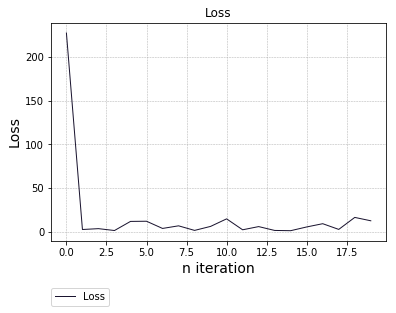

In [17]:
import matplotlib.pyplot as plt
color_map = plt.get_cmap('cubehelix')
colors = color_map(np.linspace(0.1, 1, 10))

losses_fig = plt.figure()
n_iter = np.arange(np.shape(losses)[0])
plt.plot(n_iter, losses, color = colors[0], linewidth = 1, linestyle = "-", marker = "",  label='Loss')

plt.legend(bbox_to_anchor=(0., -0.3), loc=3, borderaxespad=0.)
plt.xlabel('n iteration', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss')
plt.grid(True, which = "both", linewidth = 0.5,  linestyle = "--")

print("final loss is {0}".format(losses[-1]))
#losses_fig.savefig('gridSearch.eps', bbox_inches='tight')

In [18]:
print(k)

100


Compare solution obtained with ground truth 

In [22]:
# Just factorized some code to make it compatible with the new functions in iterativeMethod
k = 500
# Initialize u0
#a = np.random.rand(N**2)
B_idx = torch.ones(1,1,N,N)
B_idx[0,0,0,:] = torch.zeros(N)
B_idx[0,0,N-1,:] = torch.zeros(N)
B_idx[0,0,:,0] = torch.zeros(N)
B_idx[0,0,:,N-1] = torch.zeros(N)

# Define boundary values
B = torch.abs(B_idx-1)*np.random.rand()*3

# Initialize f: we use a zero forcing term for training
f = torch.zeros(1, 1, N, N)

# Initialize solution vector randomly 
initial_u = torch.randn(1, 1, N, N, requires_grad = True)

# Compute ustar = ground_truth solution torch 
ground_truth = im.jacobi_method(B_idx, B, f, initial_u = None, k = 1000)
output = im.H_method(net, B_idx, B, f, initial_u, k)
        
# Define the loss, CHECK if it is correct wrt paper

# I should look for an analitical solution

loss = F.mse_loss(ground_truth, u)

In [23]:
print(F.mse_loss(ground_truth, output))

tensor(8.0109e-09, grad_fn=<SumBackward0>)


In [24]:
H = build_H_from_net()
Heq = T.numpy()+H.dot(T.numpy())-H
reg = 0.0
#spectral_radius = (np.max(np.real(np.linalg.eigvals(Heq))))

spectral_radius = calculate_spectral_radius(T,H)
print(spectral_radius)

0.9999999999999999
